<a href="https://colab.research.google.com/github/agonzalezfe/kaggle_titanic/blob/main/kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalar kaggle
!pip install -q kaggle
####
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gitandres","key":"7697453978d2bb935f4ffd699c59eee7"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permissions for the json to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#list kaggle datasets
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           7288        275  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36            792         29  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           2887         72  1.0              
omartorres25/honda-data                                     

In [ ]:
!kaggle competitions download -c titanic
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 39.0MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [ ]:
ds = df.copy()

In [ ]:
print(ds.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


hay 177 datos faltantes en edad y 687 en cabina, esto representa el 20% y el 77%  del total, en el caso de la edad podrian eliminarse al no ser tantos, o reemplazarse por la media, para la cabina son mas de la mayoria, por lo tanto afectaría bastante el analisis.

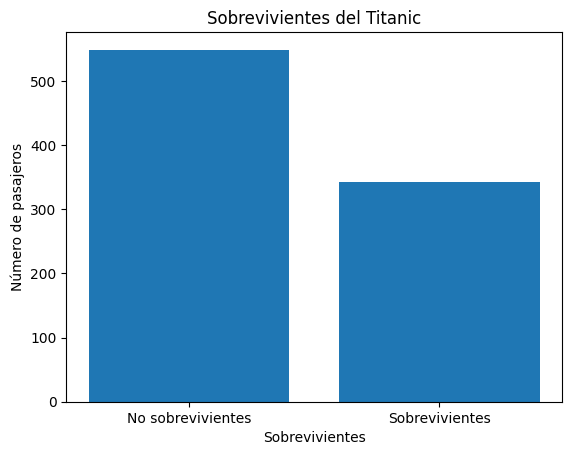

In [ ]:
# Crear un DataFrame que contenga la cuenta de sobrevivientes y no sobrevivientes
survivors = ds["Survived"].value_counts()
#grafico de barras
plt.bar(survivors.index, survivors.values, hue =)
# Añadir título y etiquetas para los ejes
plt.title("Sobrevivientes del Titanic")
plt.xlabel("Sobrevivientes")
plt.ylabel("Número de pasajeros")
# Añadir etiquetas para cada barra
plt.xticks(survivors.index, ["No sobrevivientes", "Sobrevivientes"])
#mostrar el grafico
# Mostrar el gráfico
plt.show()

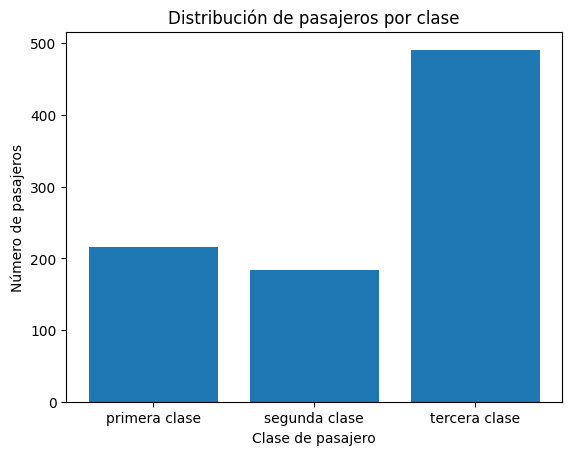

In [ ]:
# Crea un DataFrame que contenga la cuenta de pasajeros por clase
class_counts = ds["Pclass"].value_counts()

# Crea el gráfico de barras
plt.bar(class_counts.index, class_counts.values)


# Añade un título y etiquetas para los ejes
plt.title("Distribución de pasajeros por clase")
plt.xlabel("Clase de pasajero")
plt.ylabel("Número de pasajeros")
# Añade etiquetas para cada barra
plt.xticks(class_counts.index, ["tercera clase", "primera clase", "segunda clase"])

# Muestra el gráfico
plt.show()

In [ ]:
print(class_counts)
print(survivors)

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    549
1    342
Name: Survived, dtype: int64


El número de pasajeros femeninos es: 314
El número de pasajeros masculinos es: 577
male      577
female    314
Name: Sex, dtype: int64


([0, 1], [Text(0, 0, 'male'), Text(1, 0, 'female')])

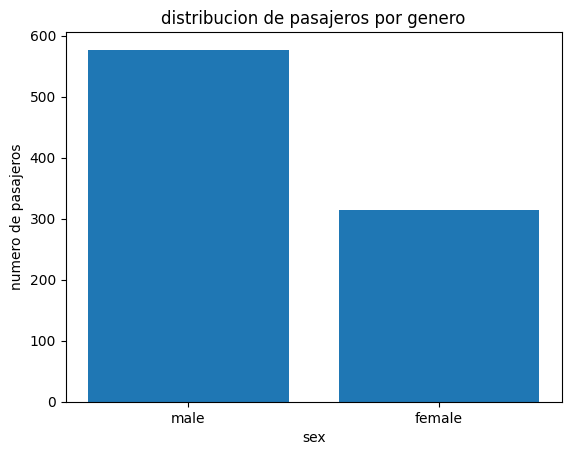

In [ ]:
gender_counts = ds["Sex"].value_counts()

# Imprimir el número de pasajeros según su género
print("El número de pasajeros femeninos es:", gender_counts["female"])
print("El número de pasajeros masculinos es:", gender_counts["male"])
print(gender_counts)
#crear el grafico
plt.bar(gender_counts.index, gender_counts.values)
#añadir titulo y etiquetas a los ejes
plt.title('distribucion de pasajeros por genero')
plt.xlabel('sex')
plt.ylabel('numero de pasajeros')



<ipython-input-44-cbae9fb59855>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ds.corr()


<Axes: >

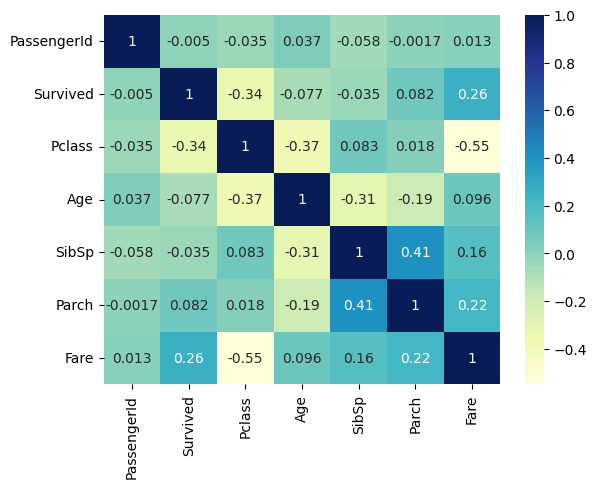

In [ ]:
# Crear una matriz de correlación
corr_matrix = ds.corr()

# Visualizar la matriz de correlación
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu")

In [ ]:
#encoding variables categoricas
pd.get_dummies(ds['Embarked'], prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0
